# 6.5 Unsupervised Machine Learning: Clustering

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
path = r'/Users/test/Desktop/Data Analysis/World Happiness Report'

In [7]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'world_happiness_final.csv'), index_col = False)

In [9]:
df.shape

(782, 12)

In [11]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social Support,Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [13]:
print(df.dtypes)

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
GDP per capita                   float64
Social Support                   float64
Life Expectancy                  float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                               int64
dtype: object


In [15]:
# Create a new dataframe excluding non-numerical columns
df_num = df.drop(columns=['Country', 'Region', 'Happiness Rank', 'Year'])

In [17]:
df_num.head()

,Happiness Score,GDP per capita,Social Support,Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## 2. The elbow technique

In [20]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [22]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] 

score

[-1535.8683256504542,
 -699.0308868309758,
 -508.64914065537346,
 -435.32329946374864,
 -360.45707769075,
 -323.2925837352778,
 -295.3468125230203,
 -273.1637048090491,
 -245.79046664218313]

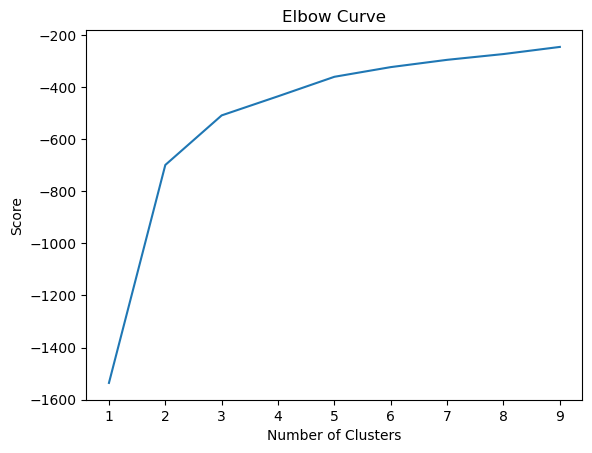

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

From the Elbow Curve, the optimal number of clusters is 3. This is determined by the "elbow point," where the curve starts to flatten, indicating that adding more clusters does not significantly improve the model's performance.

## 3. k-means clustering

In [28]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [30]:
# Fit the k-means object to the data.

kmeans.fit(df_num)

KMeans(n_clusters=3)

In [32]:
df_num['clusters'] = kmeans.fit_predict(df_num)

In [34]:
df_num.head()

,Happiness Score,GDP per capita,Social Support,Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0


In [36]:
df_num['clusters'].value_counts()

clusters
2    311
1    264
0    207
Name: count, dtype: int64

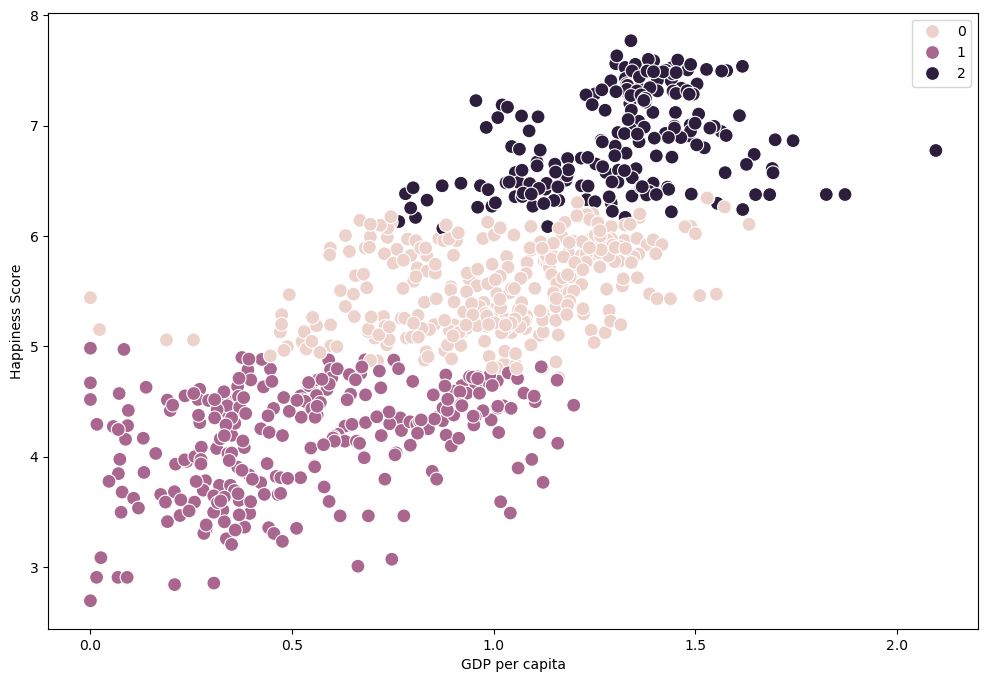

In [38]:
# Plot the clusters for the "Happiness Score" and "GDP per capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['GDP per capita'], y=df_num['Happiness Score'], hue=kmeans.labels_, s=100) 
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP per capita') 
plt.ylabel('Happiness Score') 
plt.show()

Insights:

The clustering aligns well with economic theory and the relationship between GDP and happiness. Economic wealth provides access to resources, health care, education, and social services, which are directly linked to higher happiness scores.

The clusters also highlight disparities between developed, developing, and underdeveloped countries, illustrating how economic conditions influence happiness.

In [40]:
plt.close()

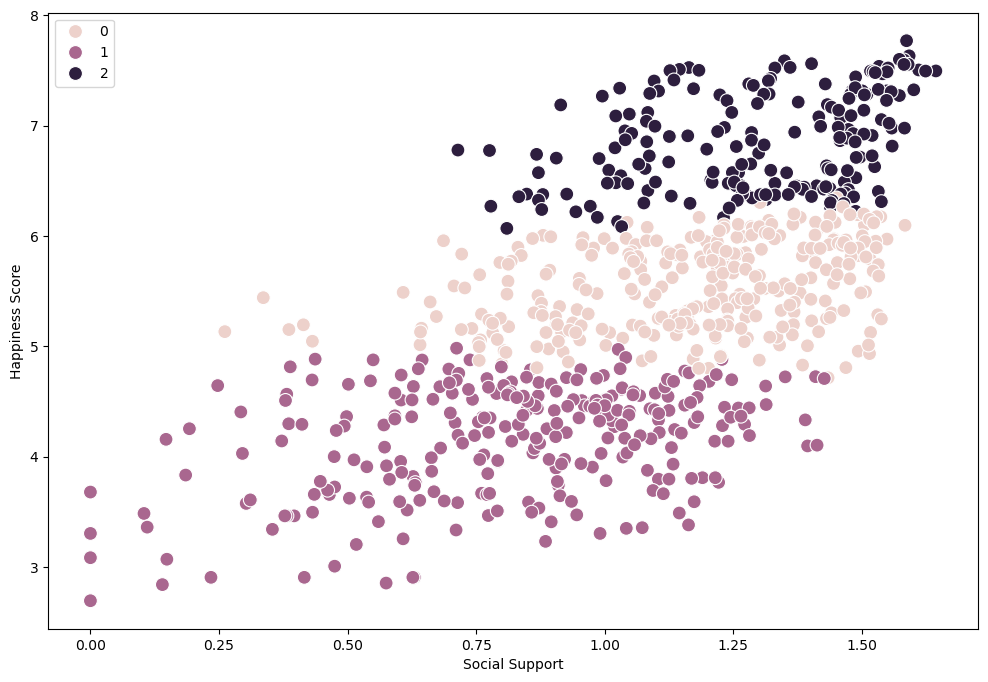

In [42]:
# Plot the clusters for the "Happiness Score" and "Social Support" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Social Support'], y=df_num['Happiness Score'], hue=kmeans.labels_, s=100) 
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Social Support') 
plt.ylabel('Happiness Score') 
plt.show()

Insights:

Countries in the dark purple cluster have consistently higher social support scores, aligning well with their happiness levels.
However, countries in the purple cluster with middle happiness scores have high and middle social support. Countries in the purple cluster with lower happiness have all range of social support. 

In [44]:
plt.close()

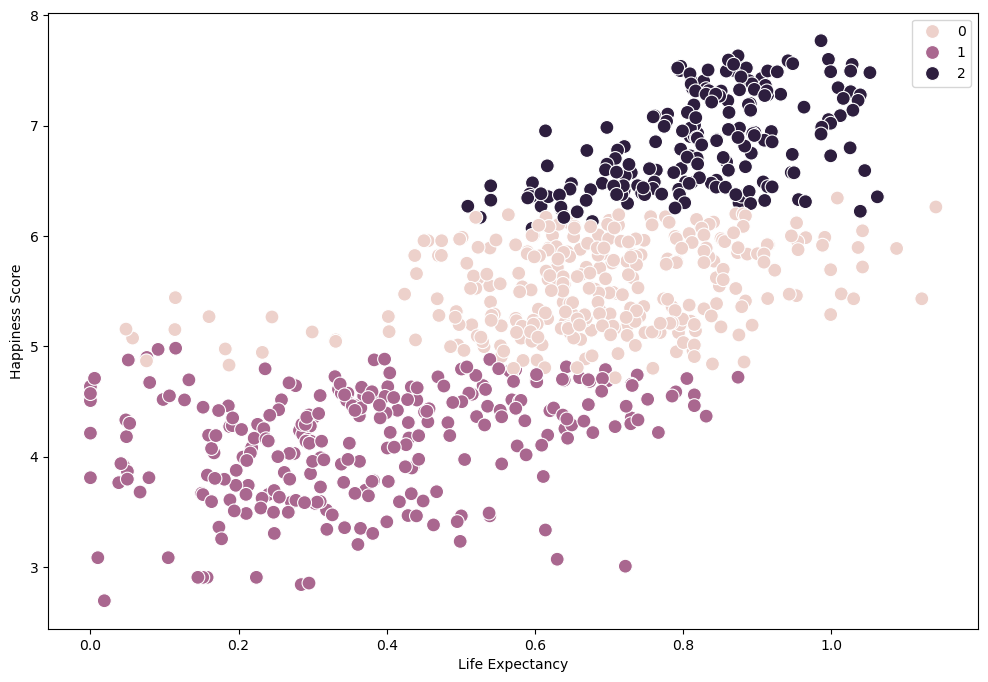

In [46]:
# Plot the clusters for the "Happiness Score" and "Life Expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Life Expectancy'], y=df_num['Happiness Score'], hue=kmeans.labels_, s=100) 
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Life Expectancy') 
plt.ylabel('Happiness Score') 
plt.show()

Insights:
The clustering by life expectancy is clear.
Countries in the dark purple cluster have both the highest life expectancy and the highest happiness scores, which is an expected outcome as health is a critical factor for overall well-being.
Most of pink cluster countries scattered at middle range of life expectancy. Purple cluster countries have significantly lower life expectancy, which correlates with their lower happiness.

In [48]:
plt.close()

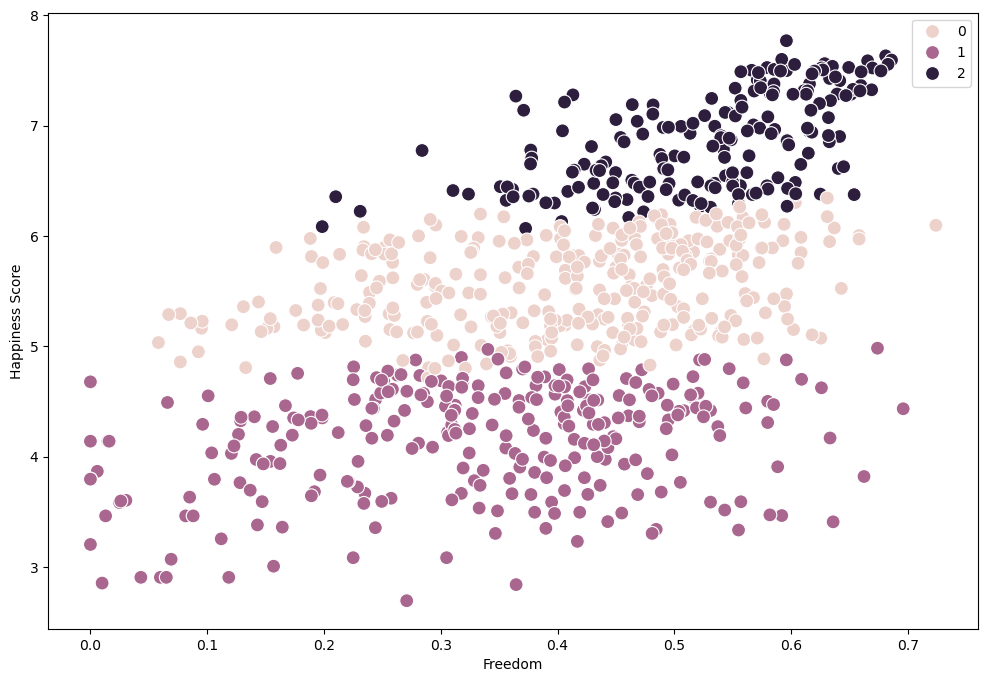

In [50]:
# Plot the clusters for the "Happiness Score" and "Freedom" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Freedom'], y=df_num['Happiness Score'], hue=kmeans.labels_, s=100) 
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Freedom') 
plt.ylabel('Happiness Score') 
plt.show()

Insights:
Higher freedom levels correspond to higher Happiness Scores, as seen by the concentration of dark purple points in the top-right.
Pink and purple clusters are scattered from low to high freedom values, indicating countries with high freedom have also low happiness score.

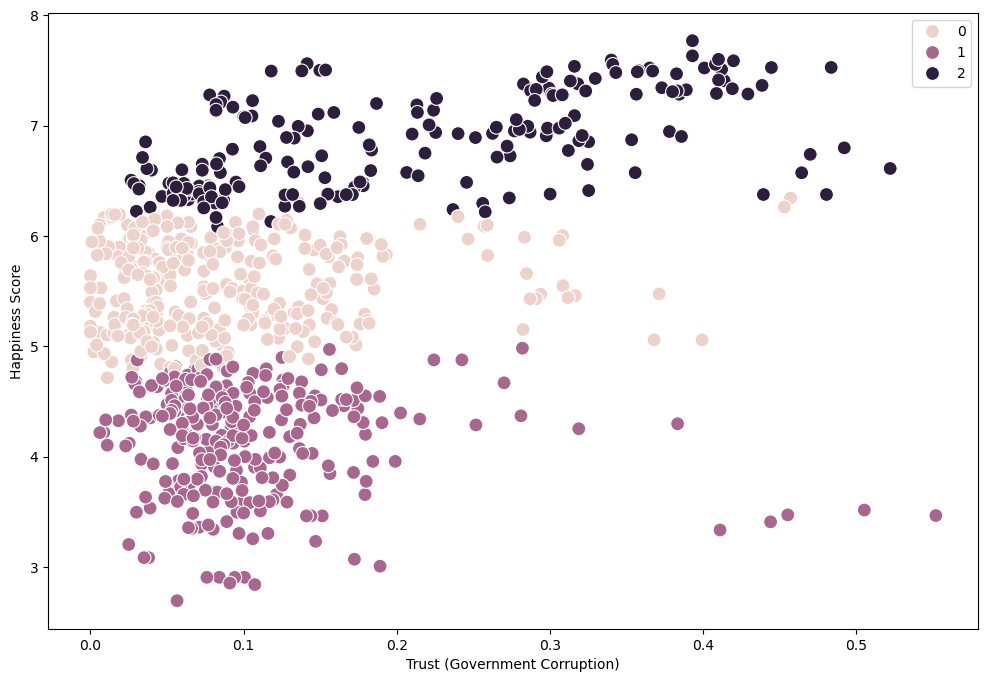

In [52]:
plt.close()
# Plot the clusters for the "Happiness Score" and "Trust (Government Corruption)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Trust (Government Corruption)'], y=df_num['Happiness Score'], hue=kmeans.labels_, s=100) 
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Trust (Government Corruption)') 
plt.ylabel('Happiness Score') 
plt.show()

Insights:

The clusters of Trust in government shows a more scattered distribution, which indicates the clusters make no sense.
While higher trust is associated with higher happiness (dark purple cluster), there is still significant overlap, suggesting trust might have less impact relative to other variables like GDP, social support and life expectancy.

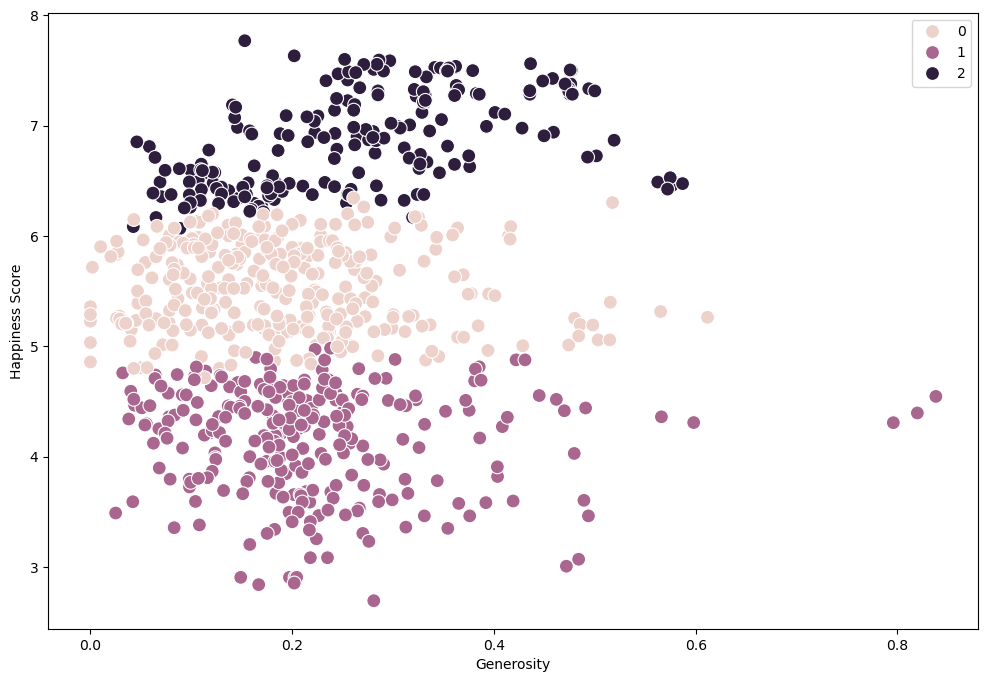

In [54]:
plt.close()
# Plot the clusters for the "Happiness Score" and "Generosity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Generosity'], y=df_num['Happiness Score'], hue=kmeans.labels_, s=100) 
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Generosity') 
plt.ylabel('Happiness Score') 
plt.show()

Insights:

Generosity shows a weaker correlation with Happiness Scores. The graph indicates that most countries have lower generosity.
Clusters are less defined for this variable compared to others, indicating that generosity might not be as impactful on clustering outcomes.

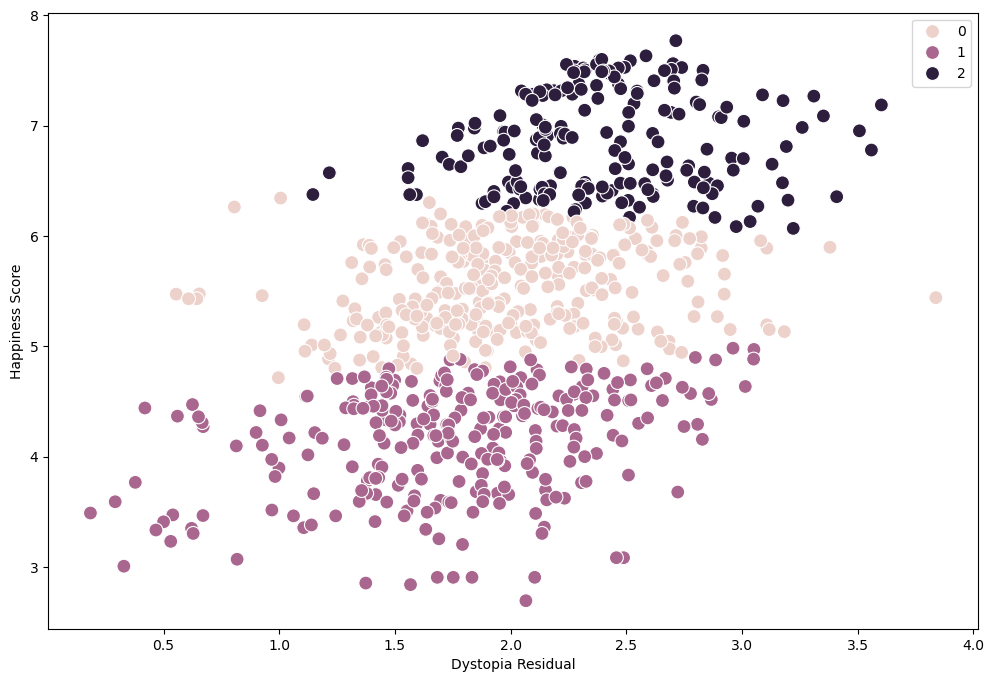

In [56]:
plt.close()
# Plot the clusters for the "Happiness Score" and "Dystopia Residual" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Dystopia Residual'], y=df_num['Happiness Score'], hue=kmeans.labels_, s=100) 
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Dystopia Residual') 
plt.ylabel('Happiness Score') 
plt.show()

Insights:
Countries with higher Happiness Scores tend to have higher Dystopia Residual values.

This makes sense because the Dystopia Residual component measures the unexplained happiness of a country beyond its measurable contributing factors, acting as a sort of "buffer" for happiness.

Dark purple cluster shows the highest values of both Happiness Scores and Dystopia Residual, suggesting that these countries have positive unexplained contributors to happiness.

In [58]:
df_num.loc[df_num['clusters'] == 2, 'cluster'] = 'dark purple'
df_num.loc[df_num['clusters'] == 1, 'cluster'] = 'purple'
df_num.loc[df_num['clusters'] == 0, 'cluster'] = 'pink'

In [64]:
df_num.groupby('cluster').agg({'Happiness Score':['mean', 'median'], 
                          'GDP per capita':['mean', 'median'], 
                          'Social Support':['mean', 'median'],
                          'Life Expectancy':['mean', 'median'],
                          'Freedom':['mean', 'median'],
                          'Generosity':['mean', 'median'],
                          'Trust (Government Corruption)':['mean', 'median'],
                          'Dystopia Residual':['mean', 'median']})

Happiness Score         GDP per capita           Social Support  \
                       mean  median           mean    median           mean   
cluster                                                                       
dark purple        6.855093  6.8525       1.316020  1.340000       1.299990   
pink               5.537347  5.5245       1.007675  1.028435       1.167581   
purple             4.152471  4.2780       0.527852  0.474000       0.819287   

                      Life Expectancy             Freedom          Generosity  \
               median            mean    median      mean   median       mean   
cluster                                                                         
dark purple  1.326975        0.823893  0.829238  0.528165  0.54927   0.263979   
pink         1.211500        0.684190  0.685818  0.405705  0.42800   0.190047   
purple       0.853755        0.380430  0.363030  0.334371  0.35200   0.219123   

                     Trust (Government Corruption)            \
              median                          mean    median   
cluster                                                        
dark purple  0.26100                      0.213573  0.183275   
pink         0.17800                      0.090491  0.069765   
purple       0.20245                      0.103759  0.087110   

            Dystopia Residual            
                         mean    median  
cluster                                  
dark purple          2.409479  2.388500  
pink                 1.991663  1.947542  
purple               1.767627  1.779500

Insights:

1. GDP per Capita has the highest mean differences between clusters, indicating it is the most significant drivers of happiness.

2. Social Support, Freedom and Life Expectancy also vary noticeably, contributing to the stratification of clusters.

3. Generosity and Trust in Government show smaller variations across clusters, suggesting these factors are less influential in determining happiness levels.

Future Analysis:

1. Building Predictive Models:

The descriptive statistics can inform feature selection for machine learning models predicting happiness scores or classifying countries into happiness clusters.
Key features like GDP per capita, Social Support, and Life Expectancy should be prioritized in the models.

2. Exploring Regional Trends:

Incorporate geographic regions to see how clusters align spatially.
Understand whether regional characteristics, such as culture or governance, influence cluster placement and happiness levels.

3. Outlier Analysis:

Investigate countries that deviate significantly from the cluster averages for specific variables.
For example, countries with high GDP but low happiness or high Freedom but low trust could provide insights into unique challenges.